In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('D:\Code\Python\Data Science\craigslist\craigslist_vehicles.csv')

df.info

<bound method DataFrame.info of         Unnamed: 0          id  \
0           362773  7307679724   
1           362712  7311833696   
2           362722  7311441996   
3           362771  7307680715   
4           362710  7311834578   
...            ...         ...   
426875      303849  7307070484   
426876      303706  7314635557   
426877      303704  7314710341   
426878      303670  7316225330   
426879      303836  7308192431   

                                                      url  \
0       https://abilene.craigslist.org/ctd/d/abilene-2...   
1       https://abilene.craigslist.org/ctd/d/abilene-2...   
2       https://abilene.craigslist.org/ctd/d/abilene-2...   
3       https://abilene.craigslist.org/ctd/d/abilene-2...   
4       https://abilene.craigslist.org/ctd/d/abilene-2...   
...                                                   ...   
426875  https://zanesville.craigslist.org/cto/d/zanesv...   
426876  https://zanesville.craigslist.org/cto/d/zanesv...   
426877  ht

**Handling missing values**

In [5]:
from pprint import pprint
from random import choice
# df.drive.fillna("awd",inplace=True)
# df.drive.value_counts(dropna=False)

cols = df.columns

for col in cols:
    if df[col].mode().count()>0:
     df[col].fillna(df[col].mode().iloc[0],inplace=True)
    else:
        #Choices from Lian's Lesson 
     df[col].fillna(choice(df[col]),inplace=True)

df.drop("county",inplace=True,axis=1)
df["posting_date"]= pd.to_datetime(df["posting_date"])
df["removal_date"] = pd.to_datetime(df["removal_date"])



In [10]:
df.set_index(df["posting_date"],inplace=True)

In [11]:
df.index

DatetimeIndex(['2021-04-16 00:00:00+00:00', '2021-04-24 00:00:00+00:00',
               '2021-04-23 00:00:00+00:00', '2021-04-16 00:00:00+00:00',
               '2021-04-24 00:00:00+00:00', '2021-04-16 00:00:00+00:00',
               '2021-04-24 00:00:00+00:00', '2021-04-23 00:00:00+00:00',
               '2021-04-18 00:00:00+00:00', '2021-04-20 00:00:00+00:00',
               ...
               '2021-05-01 00:00:00+00:00', '2021-04-05 00:00:00+00:00',
               '2021-04-29 00:00:00+00:00', '2021-04-30 00:00:00+00:00',
               '2021-05-02 00:00:00+00:00', '2021-04-15 00:00:00+00:00',
               '2021-04-30 00:00:00+00:00', '2021-04-30 00:00:00+00:00',
               '2021-05-03 00:00:00+00:00', '2021-04-17 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='posting_date', length=426880, freq=None)

**Set posting date as index**

In [13]:

df.to_csv("Main_Craigslist.csv")

In [25]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date', 'removal_date'],
      dtype='object')

**Plotting a scatter chart**

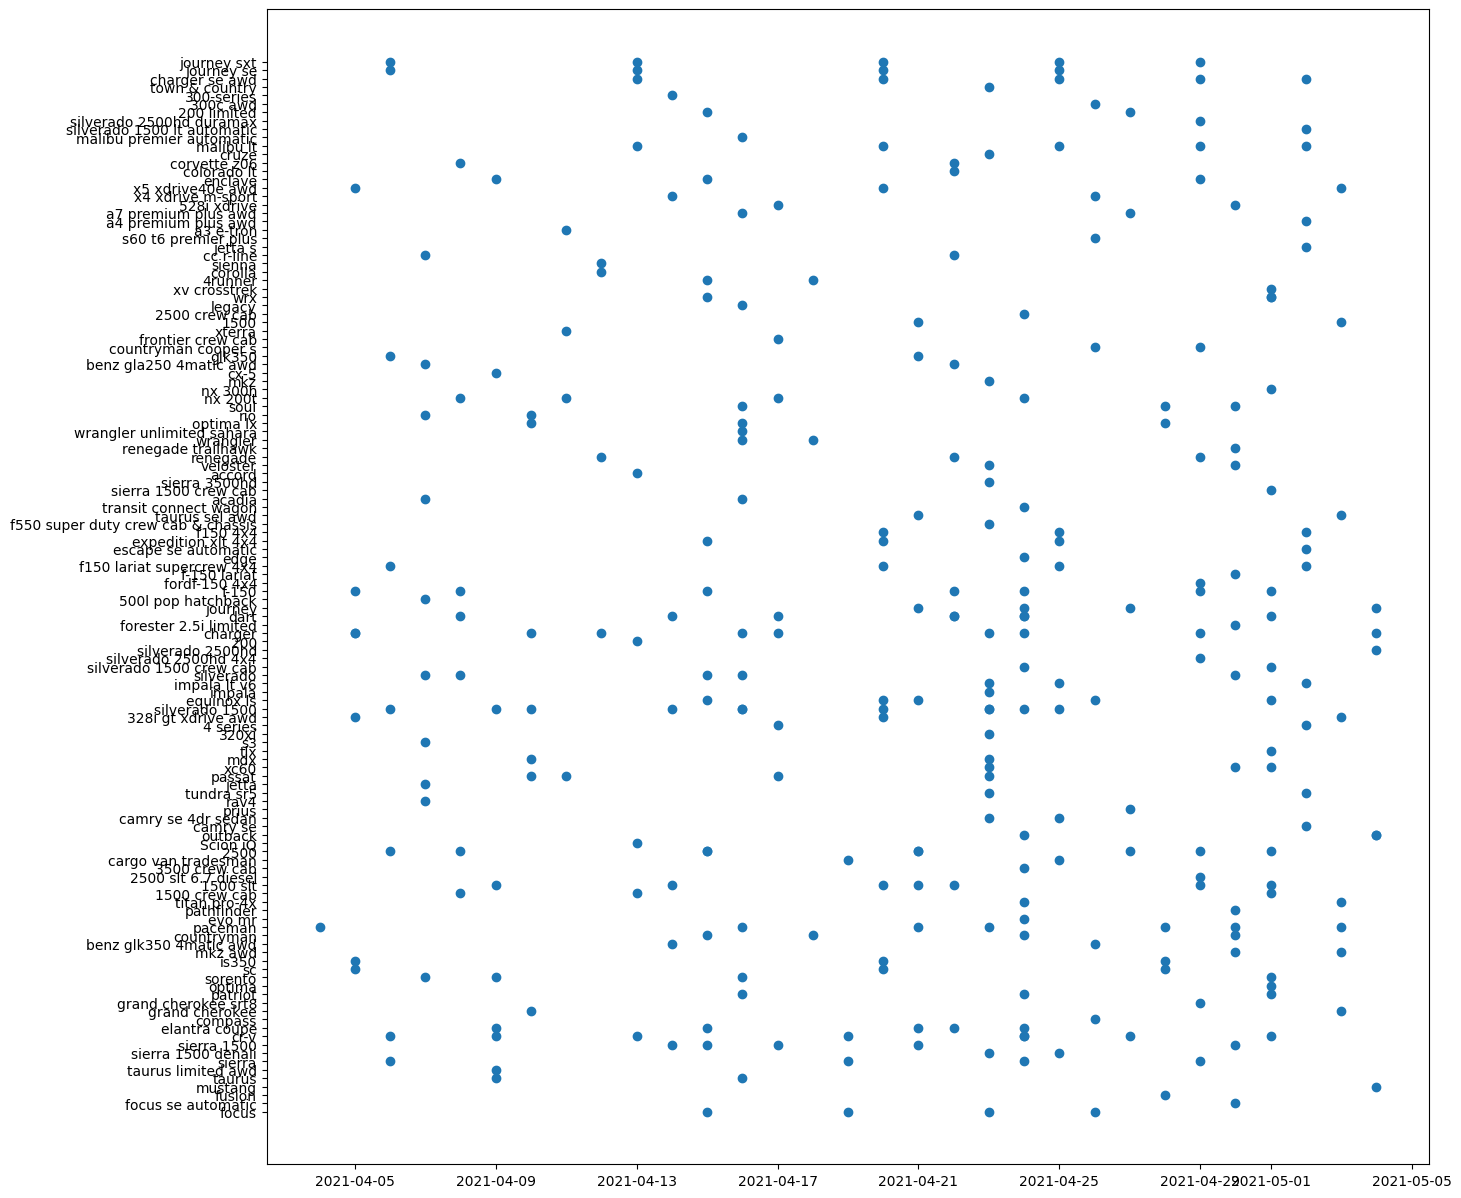

In [15]:
plt.figure(figsize=(15,15))
plt.scatter(df.iloc[11000:11300].index,df.iloc[11000:11300]["model"])
plt.show()

[('bmw', 14699), ('toyota', 34202), ('ford', 88631), ('honda', 21269), ('chrysler', 6031), ('buick', 5501), ('saturn', 1090), ('chevrolet', 55064), ('ram', 18342), ('jeep', 19014), ('nissan', 19067), ('dodge', 13707), ('gmc', 16785), ('lincoln', 4220), ('kia', 8457), ('volkswagen', 9345), ('tesla', 868), ('subaru', 9495), ('hyundai', 10338), ('infiniti', 4802), ('mercedes-benz', 11817), ('mazda', 5427), ('cadillac', 6953), ('lexus', 8200), ('mercury', 1184), ('volvo', 3374), ('acura', 5978), ('porsche', 1384), ('rover', 2113), ('audi', 7573), ('mini', 2376), ('mitsubishi', 3292), ('jaguar', 1946), ('alfa-romeo', 897), ('fiat', 792), ('pontiac', 2288), ('harley-davidson', 153), ('datsun', 63), ('ferrari', 95), ('morgan', 3), ('aston-martin', 24), ('land rover', 21)]


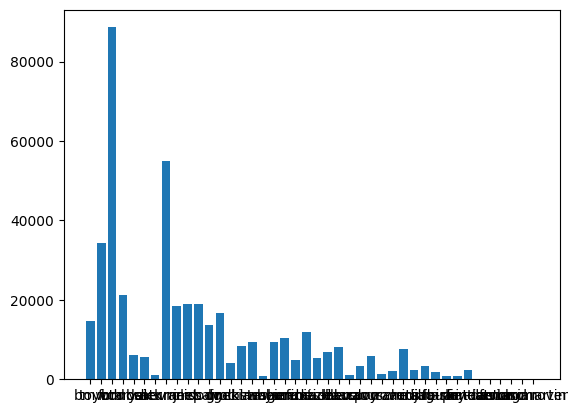

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

<Figure size 1000x700 with 0 Axes>

In [39]:

companies = df["manufacturer"].unique()

totalManufacturer = []

for company in companies:   
 totalManufacturer.append((company,len(df.loc[df["manufacturer"]==company])))
 
print(totalManufacturer)
  
#df is your dataframe
# df.plot.barh(stacked=True, x=[i[0] for i in totalManufacturer], y=[i[1] for i in totalManufacturer])

plt.bar([i[0] for i in totalManufacturer],[i[1] for i in totalManufacturer])
plt.show()



plt.figure(figsize=(10,7))
plt.scatter()
print(companies)

426880